# Zadanie 11

In [2]:
import random
import math

def BoxMuller(mu = 0,sigma = 1):
    u1 = random.random()
    u2 = random.random()
    v1 = math.sqrt(-2*math.log(u1))*math.cos(2*math.pi*u2)
    v2 = math.sqrt(-2*math.log(u1))*math.sin(2*math.pi*u2)
    return (mu + sigma*v1, mu + sigma*v2)

In [3]:
def losujBoxMuller(mu = 0, sigma = 1, n = 1000):
    toReturn = []
    for _ in range(n//2):
        v1, v2 = BoxMuller(mu, sigma)
        toReturn.append(v1)
        toReturn.append(v2)
    return toReturn

In [4]:
def losujRandomGauss(mu = 0, sigma = 1, n = 1000):
    return [random.gauss(mu, sigma) for _ in range(n)]

In [5]:
from scipy.stats import kstest

def testujRozklad(data):
    alfa = 0.05
    score = kstest(data, 'norm')
    pvalue = score[1]
    return pvalue >= alfa

In [6]:
def testuj(f, n = 1000, MCS = 1000):
    score = 0
    for _ in range(MCS):
        data = f(n = n)
        wynikTestu = testujRozklad(data)
        if wynikTestu:
            score += 1
    return score/MCS

In [7]:
testuj(losujBoxMuller, n = 1000, MCS = 100)

0.94

In [8]:
testuj(losujRandomGauss, n = 1000, MCS = 100)

0.92

# Zadanie 12

In [68]:
def OgolnyNormalny(y,alfa,beta):
    return (2*beta**(alfa/2)/math.gamma(alfa/2))* y**(alfa-1) * math.exp(-beta*y**2)

def Wykladniczy(x):
    return math.exp(-x)

def exp(lam):
    return -math.log(random.random())/lam

def generujOgolnyNormalny(alfa,beta):
    c = OgolnyNormalny(math.sqrt((alfa-1)/(2*beta)),alfa,beta)
    while True:
        y = exp(1)
        u = random.random()
        if u <= OgolnyNormalny(y,alfa,beta)/(c*Wykladniczy(y)):
            return y

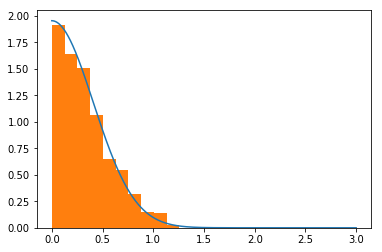

In [81]:
import numpy as np

data = [generujOgolnyNormalny(1,3) for _ in range(1000)]

x = np.linspace(0,3,1000)
y = [OgolnyNormalny(t,1,3) for t in x]
plt.plot(x,y)
plt.hist(data, density=True)
plt.show()

# Zadanie 13

In [10]:
def BiegunowyBoxMuller(mu = 0, sigma = 1):
    success = False
    while not success:
        v1 = random.uniform(-1,1)
        v2 = random.uniform(-1,1)
        r = v1**2 + v2**2
        if r <= 1:
            success = True
    x = v1*math.sqrt(-2*math.log(r)/r)
    y = v2*math.sqrt(-2*math.log(r)/r)
    return (mu + x*sigma, mu + y*sigma)

In [11]:
%timeit BiegunowyBoxMuller()

2.25 µs ± 17.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [12]:
%timeit BoxMuller()

1.64 µs ± 94.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [13]:
def losujBiegunowyBoxMuller(mu = 0, sigma = 1, n = 1000):
    toReturn = []
    for _ in range(n//2):
        v1, v2 = BiegunowyBoxMuller(mu, sigma)
        toReturn.append(v1)
        toReturn.append(v2)
    return toReturn

In [16]:
import time
import matplotlib.pyplot as plt

def countTime(f, n):
    start = time.clock()
    f(n = n)
    return time.clock() - start

def plotTime():
    ns = [10, 100, 500, 1000, 5000, 10000]
    biegunowy = []
    zwykly = []
    for n in ns:
        biegunowy.append(countTime(losujBiegunowyBoxMuller, n))
        zwykly.append(countTime(losujBoxMuller, n))
    print(biegunowy, zwykly)
    plt.plot(ns, biegunowy, label = 'Biegunowy')
    plt.plot(ns, zwykly, label = 'BoxMuller')
    plt.legend(loc = 'best')
    plt.show()

[3.4343343486398226e-05, 0.00013263636083138408, 0.0007050254180285265, 0.001325179354807915, 0.0068481416301438, 0.015195942590708] [1.8553300378698623e-05, 0.00010105627507073223, 0.00052186091988915, 0.001269124702503177, 0.006323912204152293, 0.011850821990265104]


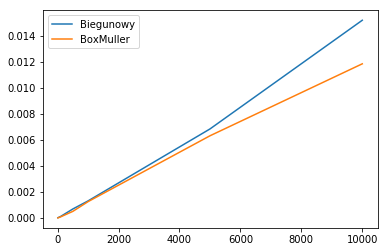

In [17]:
plotTime()